# 합성곱 신경망의 시각화

In [2]:
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.keras')

In [3]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_5, built=True>]

In [6]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [8]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.03266646 0.2568693


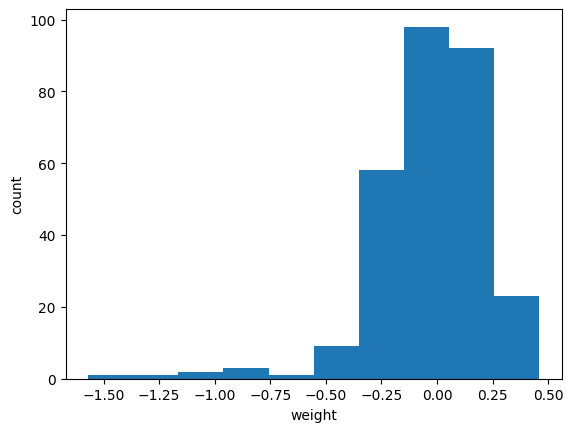

In [11]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

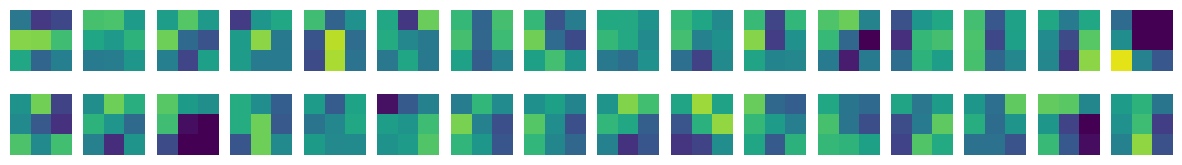

In [14]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [15]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [17]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

0.0037224954 0.08147841


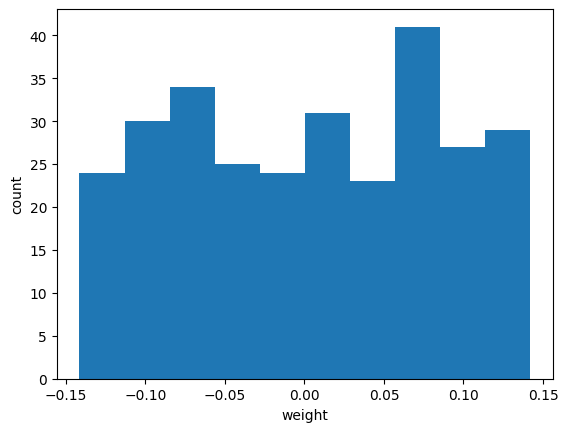

In [19]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

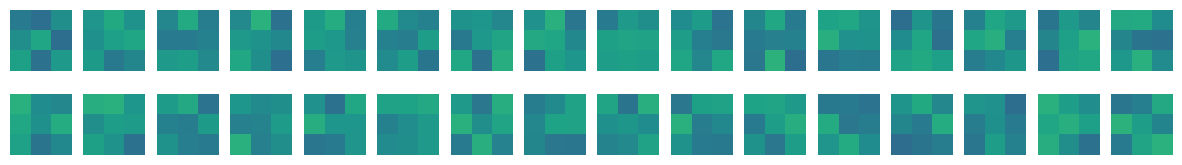

In [21]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [22]:
dense1=keras.layers.Dense(100,activation='sigmoid')
dense2=keras.layers.Dense(10,activation='softmax')

In [25]:
"""
hidden=dense1(inputs)
outputs=dense2(hidden)
model=keras.Model(inputs,outputs)
inputs=keras.Input(shape=(784,))
"""

'\nhidden=dense1(inputs)\noutputs=dense2(hidden)\nmodel=keras.Model(inputs,outputs)\ninputs=keras.Input(shape=(784,))\n'

In [26]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_1>]


In [27]:
conv_acti=keras.Model(model.inputs,model.layers[0].output)

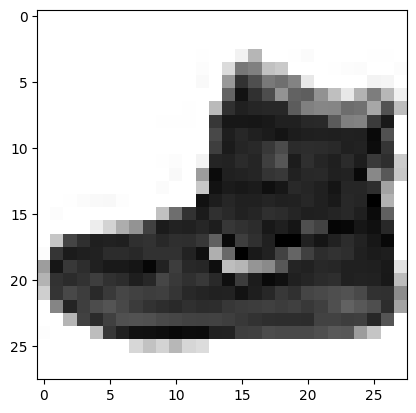

In [29]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [31]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [32]:
print(feature_maps.shape)

(1, 28, 28, 32)


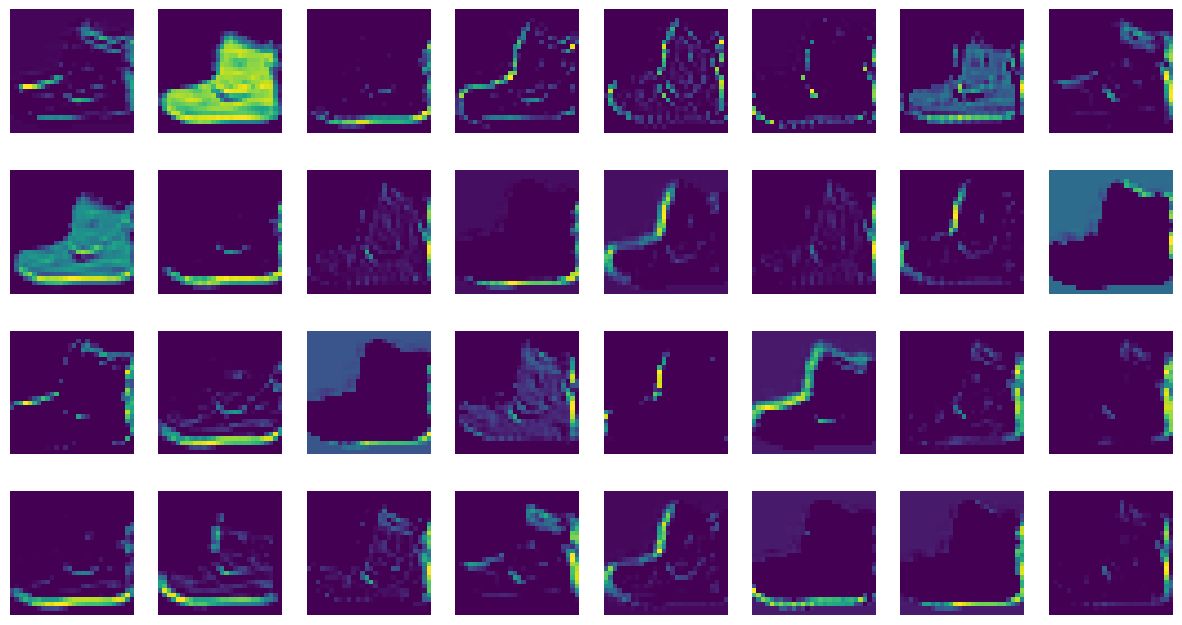

In [33]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [34]:
conv2_acti=keras.Model(model.inputs,model.layers[2].output)

In [35]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [36]:
print(feature_maps.shape)

(1, 14, 14, 64)


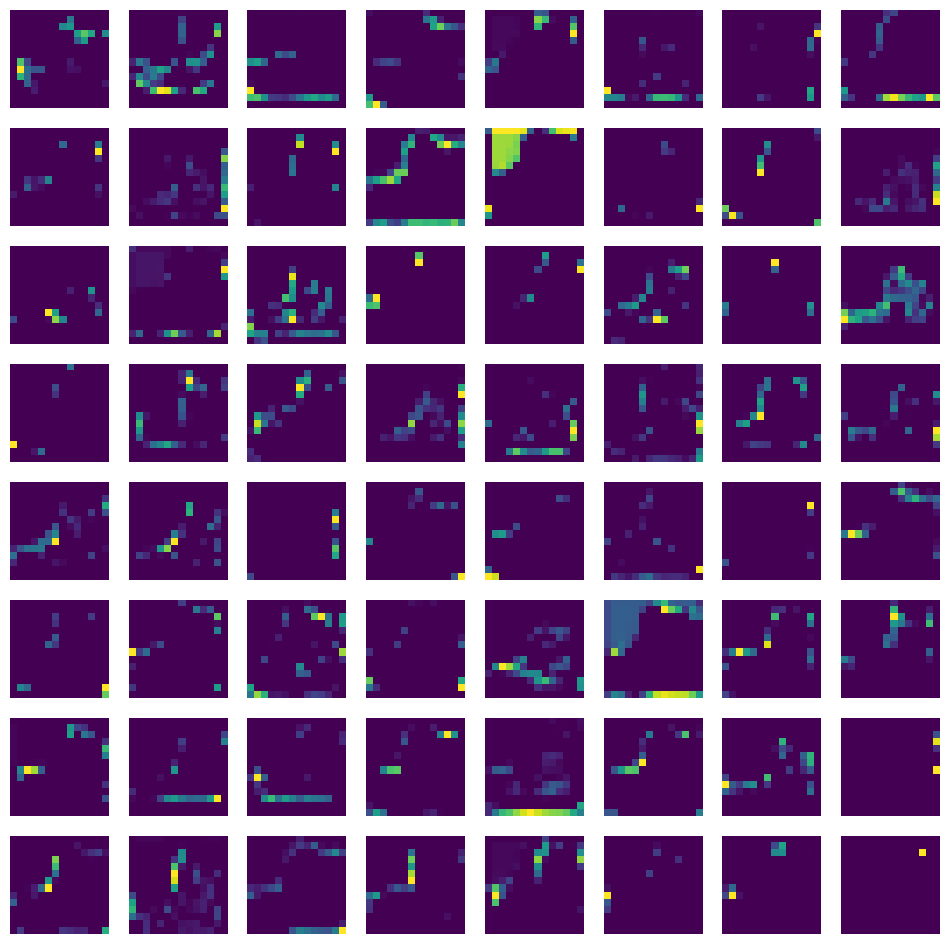

In [37]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()